In [24]:
import requests
from bs4 import BeautifulSoup as BS

import pandas as pd
pd.set_option('display.max_columns', 109)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
import seaborn as sns
from scipy.stats import spearmanr

!pip install pandas_profiling
import pandas_profiling

### READ IN READMISSION RATE DOC.  FIND HOSPITALS FROM TOP AND BOTTOM OF LIST IN TN.

In [26]:
readmission = pd.read_csv('data/Hospital_Readmissions_Reduction_Program.csv')
readmission

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM_30_AMI_HRRP,798,NaN,1.0072,14.8575,14.7514,119,07/01/2014,06/30/2017
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM_30_CABG_HRRP,290,NaN,1.1392,14.0204,12.3077,44,07/01/2014,06/30/2017
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM_30_COPD_HRRP,569,NaN,0.9913,18.2153,18.3745,103,07/01/2014,06/30/2017
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM_30_HF_HRRP,1061,NaN,1.0135,21.5968,21.3101,230,07/01/2014,06/30/2017
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM_30_HIP_KNEE_HRRP,335,NaN,1.0468,5.0853,4.8582,18,07/01/2014,06/30/2017
5,SOUTHEAST ALABAMA MEDICAL CENTER,10001,AL,READM_30_PN_HRRP,604,NaN,1.0454,16.9464,16.2104,105,07/01/2014,06/30/2017
6,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM_30_AMI_HRRP,Not Available,5.0,0.9518,14.6054,15.3444,Not Available,07/01/2014,06/30/2017
7,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM_30_CABG_HRRP,Not Available,5.0,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
8,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM_30_COPD_HRRP,641,NaN,0.9054,16.7351,18.4842,100,07/01/2014,06/30/2017
9,MARSHALL MEDICAL CENTER SOUTH,10005,AL,READM_30_HF_HRRP,337,NaN,1.0288,21.7164,21.1089,75,07/01/2014,06/30/2017


In [27]:
readmission_tn = readmission[(readmission['State'] == 'TN') & (readmission['Excess Readmission Ratio'] != 'Not Available')]
readmission_tn.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
15704,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_COPD_HRRP,70,NaN,1.0169,19.5999,19.2735,15,07/01/2014,06/30/2017
15705,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_HF_HRRP,33,NaN,1.0806,21.4628,19.8623,12,07/01/2014,06/30/2017
15707,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_PN_HRRP,81,NaN,1.0726,15.9173,14.8402,17,07/01/2014,06/30/2017
15708,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_AMI_HRRP,1268,NaN,0.9472,14.3783,15.1796,179,07/01/2014,06/30/2017
15709,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_CABG_HRRP,340,NaN,1.0933,13.4477,12.2998,48,07/01/2014,06/30/2017


### RENAME COLUMNS FACILITY NAME AND MEASURE NAME TO MORE USABLE 'NAMES.'

In [33]:
readmission_tn.rename(columns={'Facility Name': 'hosp_name', 'Measure Name': 'meas_name'}, inplace=True)
readmission_tn


,hosp_name,Facility ID,State,meas_name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
15704,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_COPD_HRRP,70,NaN,1.0169,19.5999,19.2735,15,07/01/2014,06/30/2017
15705,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_HF_HRRP,33,NaN,1.0806,21.4628,19.8623,12,07/01/2014,06/30/2017
15707,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_PN_HRRP,81,NaN,1.0726,15.9173,14.8402,17,07/01/2014,06/30/2017
15708,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_AMI_HRRP,1268,NaN,0.9472,14.3783,15.1796,179,07/01/2014,06/30/2017
15709,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_CABG_HRRP,340,NaN,1.0933,13.4477,12.2998,48,07/01/2014,06/30/2017
15710,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_COPD_HRRP,1128,NaN,1.0793,22.6106,20.9494,261,07/01/2014,06/30/2017
15711,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_HF_HRRP,1945,NaN,1.0558,23.4162,22.1790,459,07/01/2014,06/30/2017
15712,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_HIP_KNEE_HRRP,815,NaN,1.0352,4.6970,4.5371,39,07/01/2014,06/30/2017
15713,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_PN_HRRP,1628,NaN,1.0506,18.7944,17.8890,309,07/01/2014,06/30/2017
15714,SUMNER REGIONAL MEDICAL CENTER,440003,TN,READM_30_AMI_HRRP,105,NaN,1.1152,16.4769,14.7751,24,07/01/2014,06/30/2017


### CONVERT EXCESS READMISSION RATIO TO NUMBERIC VALUE

In [34]:
readmission_tn['Excess Readmission Ratio'] = pd.to_numeric(readmission_tn['Excess Readmission Ratio'], errors='coerce').fillna(0)
readmission_tn

C:\Users\tamsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,hosp_name,Facility ID,State,meas_name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
15704,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_COPD_HRRP,70,NaN,1.0169,19.5999,19.2735,15,07/01/2014,06/30/2017
15705,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_HF_HRRP,33,NaN,1.0806,21.4628,19.8623,12,07/01/2014,06/30/2017
15707,UNICOI COUNTY HOSPITAL,440001,TN,READM_30_PN_HRRP,81,NaN,1.0726,15.9173,14.8402,17,07/01/2014,06/30/2017
15708,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_AMI_HRRP,1268,NaN,0.9472,14.3783,15.1796,179,07/01/2014,06/30/2017
15709,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_CABG_HRRP,340,NaN,1.0933,13.4477,12.2998,48,07/01/2014,06/30/2017
15710,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_COPD_HRRP,1128,NaN,1.0793,22.6106,20.9494,261,07/01/2014,06/30/2017
15711,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_HF_HRRP,1945,NaN,1.0558,23.4162,22.1790,459,07/01/2014,06/30/2017
15712,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_HIP_KNEE_HRRP,815,NaN,1.0352,4.6970,4.5371,39,07/01/2014,06/30/2017
15713,JACKSON-MADISON COUNTY GENERAL HOSPITAL,440002,TN,READM_30_PN_HRRP,1628,NaN,1.0506,18.7944,17.8890,309,07/01/2014,06/30/2017
15714,SUMNER REGIONAL MEDICAL CENTER,440003,TN,READM_30_AMI_HRRP,105,NaN,1.1152,16.4769,14.7751,24,07/01/2014,06/30/2017


### FIND THE HOSPITAL WITH HIGH READMISSION RATE FOR TN--ST. FRANCIS

In [35]:
readmiss_gb_hi = readmission_tn.groupby(['hosp_name']).agg({'Excess Readmission Ratio': 'mean'}).sort_values(by='Excess Readmission Ratio', ascending=False)
readmiss_gb_hi


,Excess Readmission Ratio
hosp_name,
REGIONAL ONE HEALTH,1.174950
SUMNER REGIONAL MEDICAL CENTER,1.142360
TRISTAR SKYLINE MEDICAL CENTER,1.102340
WEST TENNESSEE HEALTHCARE DYERSBURG HOSPITAL,1.101475
ST FRANCIS HOSPITAL,1.092167
BAPTIST MEMORIAL HOSPITAL,1.082067
TENNOVA HEALTHCARE-LAFOLLETT MEDICAL CENTER,1.079933
TRISTAR SUMMIT MEDICAL CENTER,1.077120
TENNOVA HEALTHCARE-REGIONAL JACKSON,1.068520


### SINGLE OUT ST. FRANCIS HOSPITAL FOR ANALYSIS

In [36]:
stf = readmission_tn.query('hosp_name == "ST FRANCIS HOSPITAL"')
stf = stf.set_index('meas_name')
stf

,hosp_name,Facility ID,State,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
meas_name,,,,,,,,,,,
READM_30_AMI_HRRP,ST FRANCIS HOSPITAL,440183,TN,222,NaN,0.9989,15.7969,15.8145,35,07/01/2014,06/30/2017
READM_30_CABG_HRRP,ST FRANCIS HOSPITAL,440183,TN,92,NaN,1.1440,17.7735,15.5369,20,07/01/2014,06/30/2017
READM_30_COPD_HRRP,ST FRANCIS HOSPITAL,440183,TN,245,NaN,1.0183,20.6533,20.2812,52,07/01/2014,06/30/2017
READM_30_HF_HRRP,ST FRANCIS HOSPITAL,440183,TN,462,NaN,1.0728,22.6090,21.0754,109,07/01/2014,06/30/2017
READM_30_HIP_KNEE_HRRP,ST FRANCIS HOSPITAL,440183,TN,815,NaN,1.2239,5.2495,4.2893,47,07/01/2014,06/30/2017
READM_30_PN_HRRP,ST FRANCIS HOSPITAL,440183,TN,328,NaN,1.0951,18.4389,16.8379,66,07/01/2014,06/30/2017


### SINGLE OUT ST. THOMAS WEST HOSPITAL FOR ANALYSIS

In [37]:
stthomas = readmission_tn.query('hosp_name == "SAINT THOMAS WEST HOSPITAL"')
stthomas.set_index('meas_name')

,hosp_name,Facility ID,State,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
meas_name,,,,,,,,,,,
READM_30_AMI_HRRP,SAINT THOMAS WEST HOSPITAL,440082,TN,1166,NaN,0.9366,14.9260,15.9366,170,07/01/2014,06/30/2017
READM_30_CABG_HRRP,SAINT THOMAS WEST HOSPITAL,440082,TN,372,NaN,0.8766,11.3858,12.9884,39,07/01/2014,06/30/2017
READM_30_COPD_HRRP,SAINT THOMAS WEST HOSPITAL,440082,TN,463,NaN,0.9787,20.0106,20.4455,91,07/01/2014,06/30/2017
READM_30_HF_HRRP,SAINT THOMAS WEST HOSPITAL,440082,TN,1176,NaN,0.9465,21.3909,22.5998,248,07/01/2014,06/30/2017
READM_30_HIP_KNEE_HRRP,SAINT THOMAS WEST HOSPITAL,440082,TN,789,NaN,0.9051,4.0627,4.4885,30,07/01/2014,06/30/2017
READM_30_PN_HRRP,SAINT THOMAS WEST HOSPITAL,440082,TN,783,NaN,0.9982,17.1273,17.1575,134,07/01/2014,06/30/2017


### EXPLORE CORRELATION BETWEEN SDHoH AND 6 HRRP-DEFINED CONDITIONS USING PEARSON METHOD

In [38]:
PR = pd.read_csv('data/SDH.csv')
PR.corr(method='pearson')

,CCN,readm_AMI,readm_CABG,readm_COPD,readm_HF,readm_hip_knee,readm_PN,avg_readm,unemp_rate,pov_rate,vacant_housing_units,transport,25yo<hs_graduate,no_veh_available,PCT_LACCESS_HHNV10,Fast food/1000 pop,diabetes,obesity,poverty level,crime_level,poor_health,mental_health days,adult_diabetes,health_rank,smokers,excessive_drinking,air_quality,severe_housing problem,physically_inactive_adults,drug_related _deaths,food_environ_index,children_pov,income_ineq,violent_crime,injury_deaths,single_parent,2015,2016,2017,2018,2019,2020
CCN,1.000000,0.879788,0.846770,0.927794,0.793116,0.734582,0.612359,0.844156,0.332629,0.671224,0.699066,-0.258242,0.265542,0.386272,-0.425671,-0.993988,0.600783,0.948827,0.726113,-0.361917,-0.255688,-0.452715,0.019340,0.374413,-0.362810,-0.242670,-0.288303,-0.015601,0.062426,-0.331572,0.164814,-0.121138,-0.046062,-0.161734,-0.077384,-0.032848,0.696604,0.778103,0.602869,0.554665,0.528457,0.491954
readm_AMI,0.879788,1.000000,0.523854,0.742100,0.411349,0.463090,0.163948,0.512818,0.238553,0.340541,0.413456,-0.676110,-0.205812,0.027730,-0.057206,-0.858997,0.748097,0.917010,0.533639,-0.690290,-0.266529,-0.647908,0.310940,0.101749,-0.708268,-0.215345,0.091673,-0.402779,0.429299,-0.369445,0.385712,-0.483956,-0.196942,-0.550711,-0.501537,-0.417604,0.309736,0.462311,0.277671,0.284416,0.202172,0.116800
readm_CABG,0.846770,0.523854,1.000000,0.770735,0.974830,0.945403,0.870286,0.999475,0.576188,0.947816,0.937783,0.273191,0.725512,0.799688,-0.513257,-0.883822,0.462296,0.654781,0.885784,0.188275,0.072646,0.046889,-0.068476,0.744725,0.188481,-0.454034,-0.743033,0.515730,-0.155267,-0.444489,-0.314422,0.420491,0.357468,0.387989,0.254572,0.500867,0.971344,0.984614,0.911320,0.852987,0.870893,0.870888
readm_COPD,0.927794,0.742100,0.770735,1.000000,0.799693,0.552390,0.710843,0.780185,0.009086,0.527759,0.519612,-0.161321,0.297798,0.241245,-0.706131,-0.891880,0.264209,0.942860,0.487575,-0.385555,-0.549881,-0.582337,-0.344799,0.152991,-0.359910,0.104235,-0.169388,-0.081461,-0.272725,0.032779,0.360776,-0.190494,-0.311058,-0.180544,0.207108,-0.097683,0.634350,0.652696,0.440663,0.339641,0.358152,0.369615
readm_HF,0.793116,0.411349,0.974830,0.799693,1.000000,0.864495,0.955565,0.981463,0.415675,0.895713,0.861170,0.382319,0.791956,0.759607,-0.685418,-0.817297,0.256287,0.624777,0.767144,0.229434,-0.064419,0.021458,-0.287304,0.656163,0.245049,-0.276445,-0.721867,0.531869,-0.370467,-0.247126,-0.249703,0.435284,0.245656,0.432603,0.452160,0.517777,0.965966,0.936163,0.851414,0.761423,0.809514,0.840755
readm_hip_knee,0.734582,0.463090,0.945403,0.552390,0.864495,1.000000,0.721207,0.935720,0.811012,0.987467,0.998472,0.288004,0.704191,0.898569,-0.228700,-0.801104,0.627767,0.482781,0.982221,0.318737,0.383572,0.272249,0.214720,0.903022,0.297694,-0.718535,-0.840117,0.624711,0.084748,-0.699455,-0.546763,0.549730,0.619707,0.483396,0.069362,0.611936,0.941077,0.986016,0.979963,0.970892,0.961058,0.931520
readm_PN,0.612359,0.163948,0.870286,0.710843,0.955565,0.721207,1.000000,0.884718,0.238999,0.795311,0.728950,0.574586,0.875538,0.716548,-0.822432,-0.628315,-0.034145,0.459967,0.581273,0.365714,-0.143563,0.094907,-0.521319,0.560720,0.397255,-0.089163,-0.713036,0.602348,-0.618341,-0.020120,-0.249127,0.517113,0.176416,0.550153,0.694971,0.591192,0.910230,0.820732,0.753771,0.635837,0.721969,0.792724
avg_readm,0.844156,0.512818,0.999475,0.780185,0.981463,0.935720,0.884718,1.000000,0.552526,0.941839,0.928444,0.285804,0.734527,0.793522,-0.540649,-0.879044,0.434895,0.656143,0.870648,0.190121,0.049331,0.038567,-0.100772,0.731442,0.192628,-0.427543,-0.739046,0.515542,-0.186198,-0.415921,-0.301660,0.419557,0.338565,0.391296,0.282247,0.500703,0.972500,0.980022,0.903701,0.840444,0.862541,0.866875
unemp_rate,0.332629,0.238553,0.576188,0.009086,0.415675,0.811012,0.238999,0.552526,1.000000,0.772153,0.819786,0.212303,0.449818,0.809698,0.354431,-0.432189,0.758155,0.048599,0.876147,0.443242,0.826241,0.583802,0.671620,0.922368,0.389520,-0.988455,-0.762581,0.625670,0.505092,-0.9

### A PRETTY BUT RATHER USELESS GRAPH!

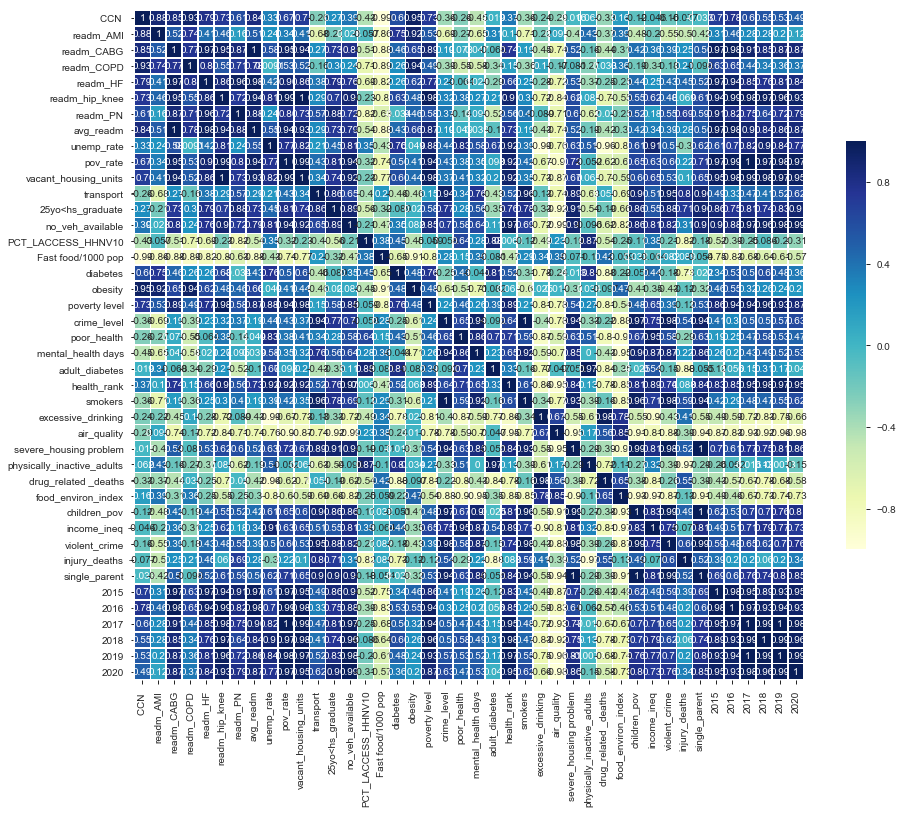

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = SDH_corr

sns.heatmap(corr, cmap='YlGnBu', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

### CHOOSE TWO MORE HOSPITALS THAT ARE IN SAME PEER GROUP AS ST. FRANCIS HOSPITAL AND ST. THOMAS WEST HOSPITAL.

In [10]:
SDH

,CCN,state,city,hospital_region,readm_AMI,readm_CABG,readm_COPD,readm_HF,readm_hip_knee,readm_PN,avg_readm,unemp_rate,pov_rate,vacant_housing_units,transport,25yo<hs_graduate,no_veh_available,PCT_LACCESS_HHNV10,Fast food/1000 pop,diabetes,obesity,poverty level,crime_level,poor_health,mental_health days,adult_diabetes,health_rank,smokers,excessive_drinking,air_quality,severe_housing problem,physically_inactive_adults,drug_related _deaths,food_environ_index,children_pov,income_ineq,violent_crime,injury_deaths,single_parent,2015,2016,2017,2018,2019,2020
0,440082,TN,Nashville,St. Thomas West_Nash,0.9366,0.8766,0.9787,0.9465,0.9051,0.9982,0.94,2.7,10.633,7.6300,4.60,24.8600,4.733,1.54,0.93,9.3,30.3,7.03,126.5,16.9,4.4,10.9,6,20.9,17.6,10.6,17.6,23,23.4,7.2,23,4.4,1105,88,41,0.12,0.03,0.02,0.03,0.02,0.26
1,440091,TN,Chattanooga,Memorial Healthcare System_Chatta,0.9792,0.8224,0.9520,0.8691,0.9350,0.8356,0.90,3.6,9.330,8.4000,2.10,9.1000,3.900,3.53,0.90,11.8,30.6,9.30,96.7,20.0,4.4,13.7,13,20.0,14.4,10.9,15.2,25,19.4,6.9,18,4.9,663,72,33,0.00,0.00,0.00,0.27,0.00,0.00
2,440183,TN,Memphis,St. Francis Hospital Region_Memphis,0.9989,1.1440,1.0183,1.0728,1.2239,1.0951,1.10,4.3,31.430,18.5667,4.37,35.2667,10.967,1.89,0.70,12.1,34.6,15.16,134.6,20.0,4.5,12.6,49,21.0,13.1,9.5,20.7,24,18.4,5.9,29,5.4,1346,82,51,0.45,0.43,1.04,1.61,2.26,1.54
3,440193,TN,Lebanon,Vanderbilt Wilson County Region_Lebanon,1.0337,0.9944,1.0415,0.9929,1.0034,0.9920,1.01,2.9,14.230,10.4000,1.40,13.2000,3.270,1.65,0.71,11.5,38.0,10.13,52.6,14.9,4.0,11.9,2,19.0,17.0,11.1,12.9,24,21.8,8.6,11,3.9,303,78,25,0.17,0.16,0.12,0.21,0.04,0.11


### EXPLORE CORRELATION BETWEEN SDoH AND 6 HRRP-DEFINED CONDITIONS USING PEARSON METHOD
### WITH NEW DATA SET FROM COUNTRYRANKINGS.ORG

In [4]:
SDH = pd.read_csv('data/SDH.csv')
SDH_corr = SDH.corr(method='pearson')
SDH_corr

,CCN,readm_AMI,readm_CABG,readm_COPD,readm_HF,readm_hip_knee,readm_PN,avg_readm,unemp_rate,pov_rate,vacant_housing_units,transport,25yo<hs_graduate,no_veh_available,PCT_LACCESS_HHNV10,Fast food/1000 pop,diabetes,obesity,poverty level,crime_level,poor_health,mental_health days,adult_diabetes,health_rank,smokers,excessive_drinking,air_quality,severe_housing problem,physically_inactive_adults,drug_related _deaths,food_environ_index,children_pov,income_ineq,violent_crime,injury_deaths,single_parent,2015,2016,2017,2018,2019,2020
CCN,1.000000,0.879788,0.846770,0.927794,0.793116,0.734582,0.612359,0.844156,0.332629,0.671224,0.699066,-0.258242,0.265542,0.386272,-0.425671,-0.993988,0.600783,0.948827,0.726113,-0.361917,-0.255688,-0.452715,0.019340,0.374413,-0.362810,-0.242670,-0.288303,-0.015601,0.062426,-0.331572,0.164814,-0.121138,-0.046062,-0.161734,-0.077384,-0.032848,0.696604,0.778103,0.602869,0.554665,0.528457,0.491954
readm_AMI,0.879788,1.000000,0.523854,0.742100,0.411349,0.463090,0.163948,0.512818,0.238553,0.340541,0.413456,-0.676110,-0.205812,0.027730,-0.057206,-0.858997,0.748097,0.917010,0.533639,-0.690290,-0.266529,-0.647908,0.310940,0.101749,-0.708268,-0.215345,0.091673,-0.402779,0.429299,-0.369445,0.385712,-0.483956,-0.196942,-0.550711,-0.501537,-0.417604,0.309736,0.462311,0.277671,0.284416,0.202172,0.116800
readm_CABG,0.846770,0.523854,1.000000,0.770735,0.974830,0.945403,0.870286,0.999475,0.576188,0.947816,0.937783,0.273191,0.725512,0.799688,-0.513257,-0.883822,0.462296,0.654781,0.885784,0.188275,0.072646,0.046889,-0.068476,0.744725,0.188481,-0.454034,-0.743033,0.515730,-0.155267,-0.444489,-0.314422,0.420491,0.357468,0.387989,0.254572,0.500867,0.971344,0.984614,0.911320,0.852987,0.870893,0.870888
readm_COPD,0.927794,0.742100,0.770735,1.000000,0.799693,0.552390,0.710843,0.780185,0.009086,0.527759,0.519612,-0.161321,0.297798,0.241245,-0.706131,-0.891880,0.264209,0.942860,0.487575,-0.385555,-0.549881,-0.582337,-0.344799,0.152991,-0.359910,0.104235,-0.169388,-0.081461,-0.272725,0.032779,0.360776,-0.190494,-0.311058,-0.180544,0.207108,-0.097683,0.634350,0.652696,0.440663,0.339641,0.358152,0.369615
readm_HF,0.793116,0.411349,0.974830,0.799693,1.000000,0.864495,0.955565,0.981463,0.415675,0.895713,0.861170,0.382319,0.791956,0.759607,-0.685418,-0.817297,0.256287,0.624777,0.767144,0.229434,-0.064419,0.021458,-0.287304,0.656163,0.245049,-0.276445,-0.721867,0.531869,-0.370467,-0.247126,-0.249703,0.435284,0.245656,0.432603,0.452160,0.517777,0.965966,0.936163,0.851414,0.761423,0.809514,0.840755
readm_hip_knee,0.734582,0.463090,0.945403,0.552390,0.864495,1.000000,0.721207,0.935720,0.811012,0.987467,0.998472,0.288004,0.704191,0.898569,-0.228700,-0.801104,0.627767,0.482781,0.982221,0.318737,0.383572,0.272249,0.214720,0.903022,0.297694,-0.718535,-0.840117,0.624711,0.084748,-0.699455,-0.546763,0.549730,0.619707,0.483396,0.069362,0.611936,0.941077,0.986016,0.979963,0.970892,0.961058,0.931520
readm_PN,0.612359,0.163948,0.870286,0.710843,0.955565,0.721207,1.000000,0.884718,0.238999,0.795311,0.728950,0.574586,0.875538,0.716548,-0.822432,-0.628315,-0.034145,0.459967,0.581273,0.365714,-0.143563,0.094907,-0.521319,0.560720,0.397255,-0.089163,-0.713036,0.602348,-0.618341,-0.020120,-0.249127,0.517113,0.176416,0.550153,0.694971,0.591192,0.910230,0.820732,0.753771,0.635837,0.721969,0.792724
avg_readm,0.844156,0.512818,0.999475,0.780185,0.981463,0.935720,0.884718,1.000000,0.552526,0.941839,0.928444,0.285804,0.734527,0.793522,-0.540649,-0.879044,0.434895,0.656143,0.870648,0.190121,0.049331,0.038567,-0.100772,0.731442,0.192628,-0.427543,-0.739046,0.515542,-0.186198,-0.415921,-0.301660,0.419557,0.338565,0.391296,0.282247,0.500703,0.972500,0.980022,0.903701,0.840444,0.862541,0.866875
unemp_rate,0.332629,0.238553,0.576188,0.009086,0.415675,0.811012,0.238999,0.552526,1.000000,0.772153,0.819786,0.212303,0.449818,0.809698,0.354431,-0.432189,0.758155,0.048599,0.876147,0.443242,0.826241,0.583802,0.671620,0.922368,0.389520,-0.988455,-0.762581,0.625670,0.505092,-0.9

### SCATTER PLOTS TO DISPLAY CORRELATIONS (POSITIVE AND NEGATIVE)

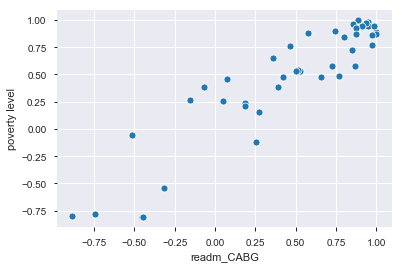

In [13]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr['poverty level'], data=SDH_corr)

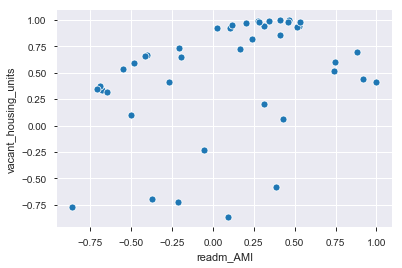

In [13]:
sns.scatterplot(SDH_corr.readm_AMI, SDH_corr.vacant_housing_units, data=SDH_corr)

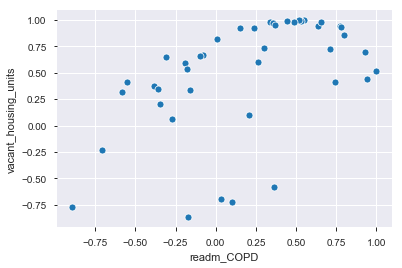

In [14]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.vacant_housing_units, data=SDH_corr)

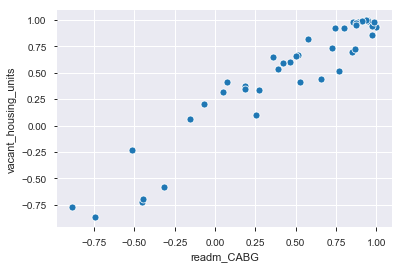

In [15]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr.vacant_housing_units, data=SDH_corr)

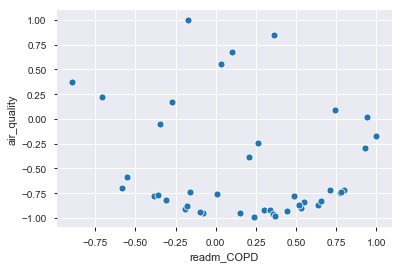

In [16]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.air_quality, data=SDH_corr)

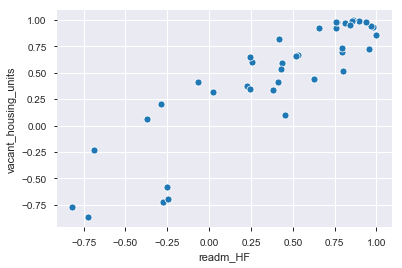

In [17]:
sns.scatterplot(SDH_corr.readm_HF, SDH_corr.vacant_housing_units, data=SDH_corr)

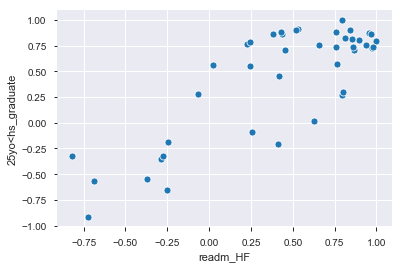

In [18]:
sns.scatterplot(SDH_corr.readm_HF, SDH_corr['25yo<hs_graduate'], data=SDH_corr)

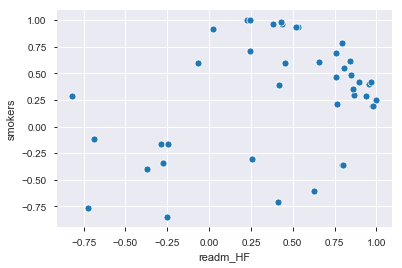

In [19]:
sns.scatterplot(SDH_corr.readm_HF, SDH_corr.smokers, data=SDH_corr)

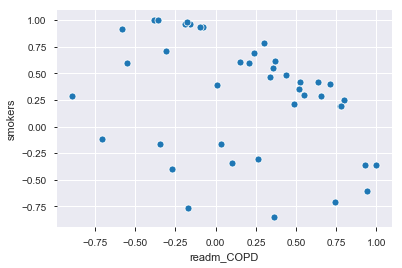

In [20]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.smokers, data=SDH_corr)

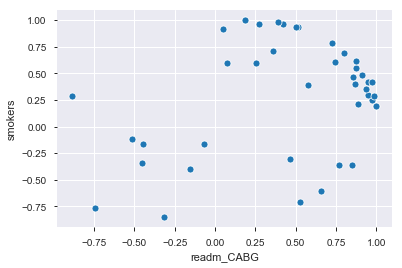

In [63]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr.smokers, data=SDH_corr)

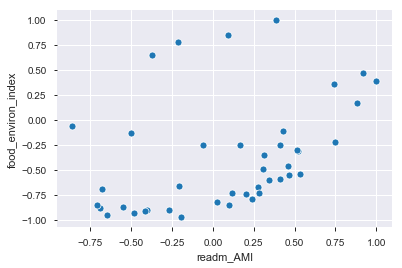

In [24]:
sns.scatterplot(SDH_corr.readm_AMI, SDH_corr.food_environ_index, data=SDH_corr)

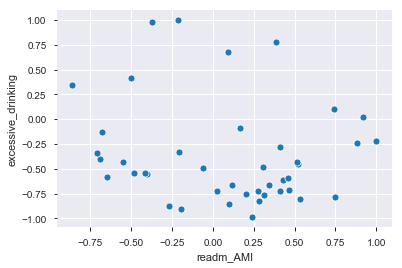

In [25]:
sns.scatterplot(SDH_corr.readm_AMI, SDH_corr.excessive_drinking, data=SDH_corr)

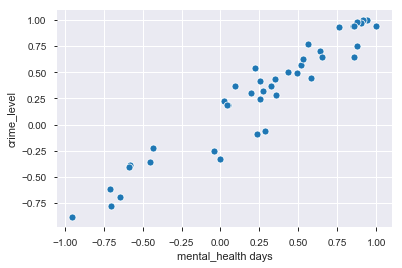

In [26]:
sns.scatterplot(SDH_corr['mental_health days'], SDH_corr.crime_level, data=SDH_corr)

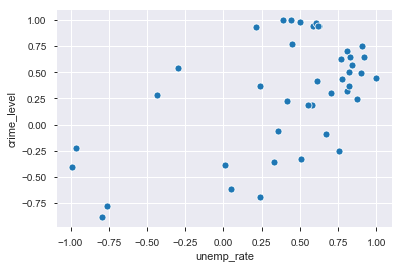

In [27]:
sns.scatterplot(SDH_corr.unemp_rate, SDH_corr.crime_level, data=SDH_corr)

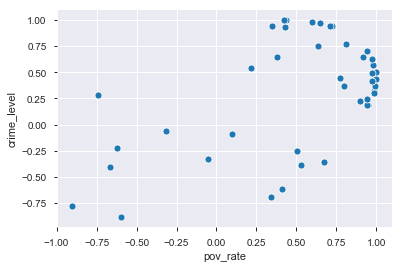

In [28]:
sns.scatterplot(SDH_corr.pov_rate, SDH_corr.crime_level, data=SDH_corr)

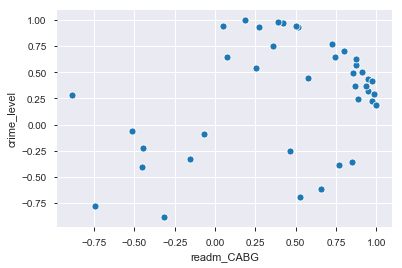

In [29]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr.crime_level, data=SDH_corr)

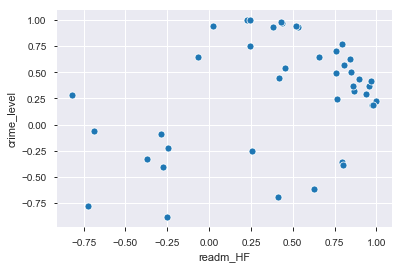

In [30]:
sns.scatterplot(SDH_corr.readm_HF, SDH_corr.crime_level, data=SDH_corr)

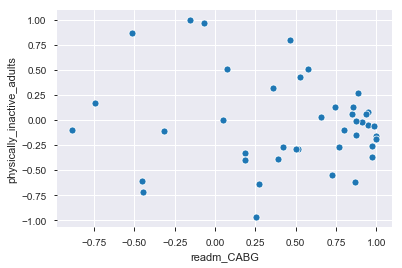

In [31]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr.physically_inactive_adults, data=SDH_corr)

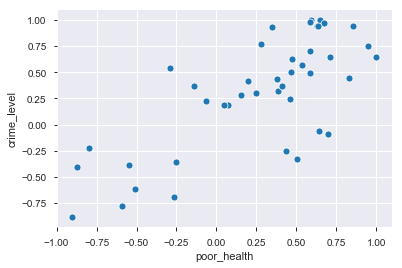

In [32]:
sns.scatterplot(SDH_corr.poor_health, SDH_corr.crime_level, data=SDH_corr)

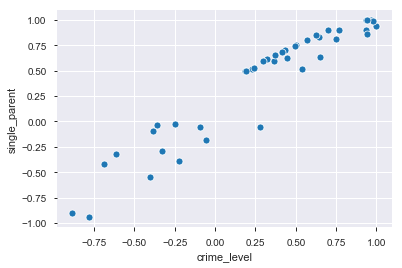

In [33]:
sns.scatterplot(SDH_corr.crime_level, SDH_corr.single_parent, data=SDH_corr)

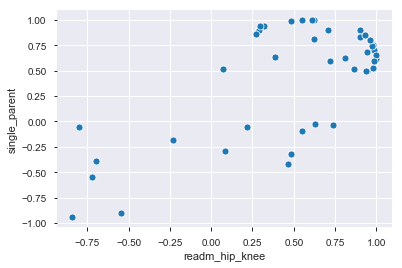

In [34]:
sns.scatterplot(SDH_corr.readm_hip_knee, SDH_corr.single_parent, data=SDH_corr)

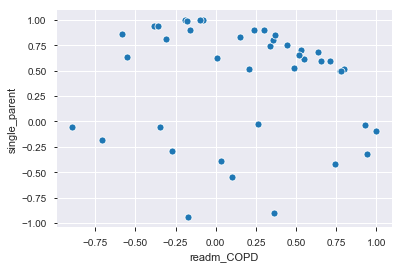

In [35]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.single_parent, data=SDH_corr)

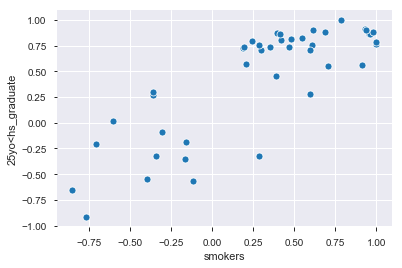

In [36]:
sns.scatterplot(SDH_corr.smokers, SDH_corr['25yo<hs_graduate'], data=SDH_corr)

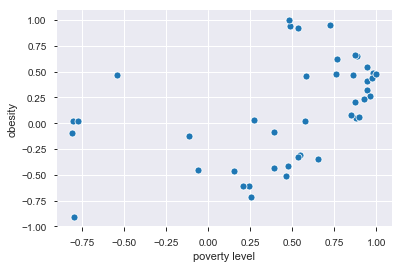

In [37]:
sns.scatterplot(SDH_corr['poverty level'], SDH_corr.obesity, data=SDH_corr)

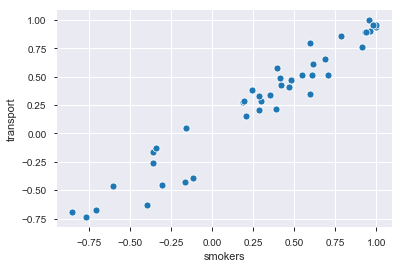

In [38]:
sns.scatterplot(SDH_corr.smokers, SDH_corr.transport, data=SDH_corr)

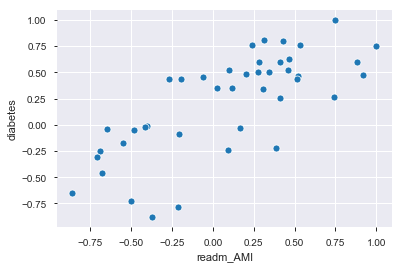

In [40]:
sns.scatterplot(SDH_corr.readm_AMI, SDH_corr.diabetes, data=SDH_corr)

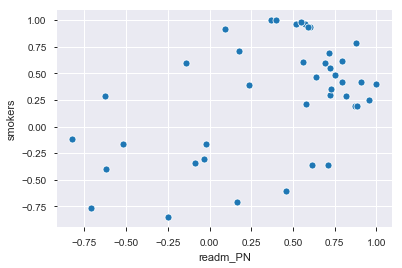

In [41]:
sns.scatterplot(SDH_corr.readm_PN, SDH_corr.smokers, data=SDH_corr)

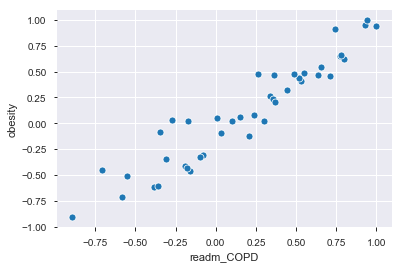

In [44]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.obesity, data=SDH_corr)

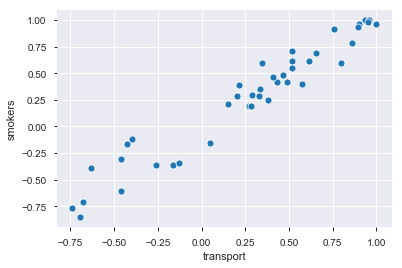

In [45]:
sns.scatterplot(SDH_corr.transport, SDH_corr.smokers, data=SDH_corr)

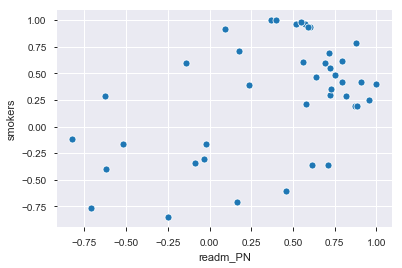

In [39]:
sns.scatterplot(SDH_corr.readm_PN, SDH_corr.smokers, data=SDH_corr)

In [15]:
CH = pd.read_csv('data/County_Health.csv')
CH = CH.corr(method='pearson')
CH

,FIPS,readm_AMI,readm_CABG,readm_COPD,readm_HF,readm_hip_knee,readm_PN,Years of Potential Life Lost Rate,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,# Alcohol-Impaired Driving Deaths,# Driving Deaths,% Alcohol-Impaired,Chlamydia Rate,Z-Score,Teen Birth Rate,# Uninsured,% Uninsured,# Primary Care Physicians,PCP Rate,Dentist Rate,# Mental Health Providers,MHP Rate,Preventable Hosp. Rate,% Screened,% Vaccinated,Graduation Rate,% Some College,# Unemployed,Labor Force,% Unemployed,% Children in Poverty,80th Percentile Income,20th Percentile Income,Income Ratio,# Single-Parent Households,# Households,% Single-Parent Households,# Associations,Association Rate,Annual Average Violent Crimes,Violent Crime Rate,# Injury Deaths,Injury Death Rate,% Severe Housing Problems,Severe Housing Cost Burden,Overcrowding,Inadequate Facilities,% Drive Alone,# Workers who Drive Alone,% Long Commute - Drives Alone
FIPS,1.000000,0.938916,0.762572,0.905063,0.694627,0.654289,0.493300,-0.090536,-0.042348,-0.597831,-0.545000,0.285919,-0.513516,0.986882,0.261259,0.157572,-0.748380,-0.220048,-0.208275,-0.047883,0.335979,-0.360897,-0.361009,-0.059048,-0.239943,-0.598878,-0.400773,-0.820744,-0.778745,-0.672800,-0.947715,0.119314,-0.364433,0.155988,0.607227,-0.503579,-0.056025,-0.321835,0.284876,-0.252256,0.653615,0.404967,-0.121013,0.043338,-0.066178,-0.167755,-0.560122,-0.911867,-0.057426,-0.298592,-0.218706,-0.196544,-0.143098,-0.045738,-0.238758,NaN,0.781235,-0.254360,0.680754
readm_AMI,0.938916,1.000000,0.523854,0.742100,0.411349,0.463090,0.163948,-0.275520,-0.230695,-0.767422,-0.647908,0.160001,-0.733073,0.943488,0.385712,0.429299,-0.819151,-0.255783,-0.510405,-0.317352,0.400395,-0.540571,-0.540284,-0.287879,-0.517045,-0.820460,-0.618657,-0.767791,-0.832311,-0.884334,-0.999596,-0.103834,-0.060229,0.286458,0.770106,-0.396247,-0.306842,-0.591224,0.238553,-0.483956,0.700074,0.468318,-0.196942,-0.226611,-0.333995,-0.417604,-0.777579,-0.722461,-0.338979,-0.550711,-0.495989,-0.501537,-0.408823,-0.297266,-0.551538,NaN,0.922508,-0.523209,0.617778
readm_CABG,0.762572,0.523854,1.000000,0.770735,0.974830,0.945403,0.870286,0.510551,0.548973,0.052595,0.046889,0.689693,0.163317,0.674909,-0.314422,-0.155267,-0.195327,-0.403352,0.464972,0.604484,-0.178612,0.289074,0.288636,0.572257,0.444897,0.053746,0.279061,-0.443781,-0.248663,-0.073152,-0.547838,0.189668,-0.879972,-0.402295,-0.038429,-0.781031,0.589201,0.366304,0.576188,0.420491,0.124974,-0.120922,0.357468,0.672021,0.589764,0.500867,0.108329,-0.955571,0.600774,0.387989,0.464455,0.254572,0.527650,0.597347,0.412828,NaN,0.386135,0.431570,0.315326
readm_COPD,0.905063,0.742100,0.770735,1.000000,0.799693,0.552390,0.710843,-0.147187,-0.104071,-0.507169,-0.582337,0.096716,-0.366947,0.922137,0.360776,-0.272725,-0.735725,0.123499,-0.001872,0.028815,0.488673,-0.352180,-0.352885,-0.053851,-0.088144,-0.388068,-0.311172,-0.909924,-0.772510,-0.405749,-0.755109,0.525922,-0.458643,0.273162,0.523857,-0.284930,-0.013020,-0.154373,0.009086,-0.190494,0.718681,0.539267,-0.311058,0.101248,0.011682,-0.097683,-0.390241,-0.908688,0.046663,-0.180544,-0.074498,0.207108,-0.048789,-0.003785,0.025279,NaN,0.449753,-0.116381,0.845805
readm_HF,0.694627,0.411349,0.974830,0.799693,1.000000,0.864495,0.955565,0.462362,0.497194,0.092575,0.021458,0.569819,0.228890,0.625562,-0.249703,-0.370467,-0.187998,-0.213506,0.553177,0.622106,-0.090681,0.280287,0.279557,0.554041,0.505381,0.155672,0.312039,-0.480735,-0.242995,0.061713,-0.436722,0.393700,-0.900202,-0.326198,-0.075074,-0.644499,0.589915,0.436999,0.415675,0.435284,0.159478,-0.043972,0.245656,0.678291,0.608359,0.517777,0.187509,-0.927363,0.632584,0.432603,0.520499,0.452160,0.556315,0.597313,0.532381,NaN,0.207754,0.485279,0.394857
readm_hip_knee,0.654289,0.463090,0.945403,0.552390,0.864495,1.000000,0.721207,0.693548,0.727487,0.199971,0.272249,0.882524,0.262866,0.529478,-0.546763,0.084748,0.0

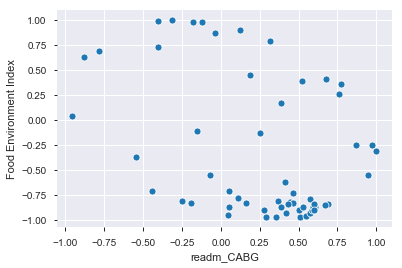

In [19]:
sns.scatterplot(CH['readm_CABG'], CH['Food Environment Index'], data=CH)

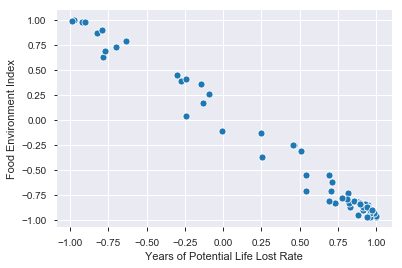

In [21]:
sns.scatterplot(CH['Years of Potential Life Lost Rate'], CH['Food Environment Index'], data=CH)

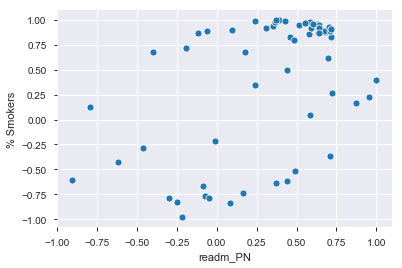

In [22]:
sns.scatterplot(CH['readm_PN'], CH['% Smokers'], data=CH)

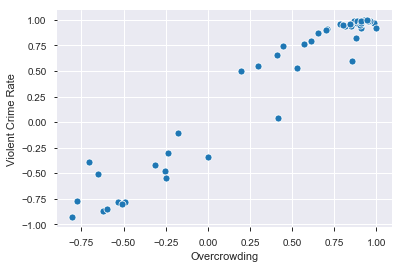

In [58]:
sns.scatterplot(CH['Overcrowding'], CH['Violent Crime Rate'], data=CH)

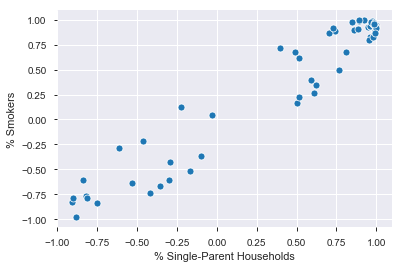

In [20]:
sns.scatterplot(CH['% Single-Parent Households'], CH['% Smokers'], data=CH)

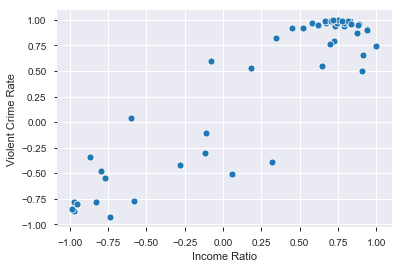

In [60]:
sns.scatterplot(CH['Income Ratio'], CH['Violent Crime Rate'], data=CH)

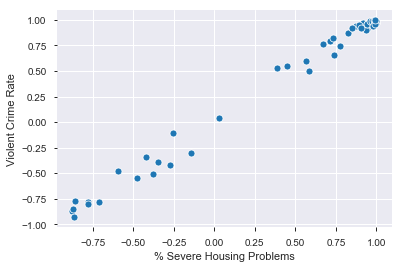

In [62]:
sns.scatterplot(CH['% Severe Housing Problems'], CH['Violent Crime Rate'], data=CH)

In [ ]:
sns.scatterplot(CH['% Severe Housing Problems'], CH['Violent Crime Rate'], data=CH)

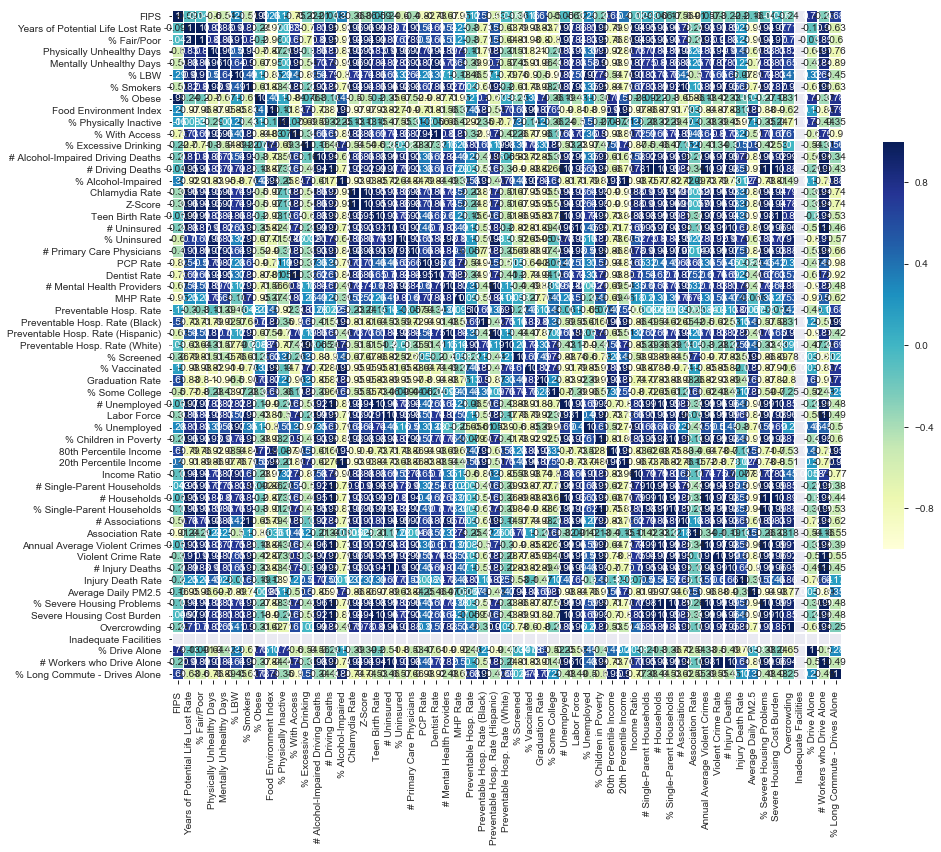

In [52]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = CH

sns.heatmap(corr, cmap='YlGnBu', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

### CREATE LINE PLOTS TO TRACK TRENDS IN ERROR PENALTIES FOR 4 HOSPITALS

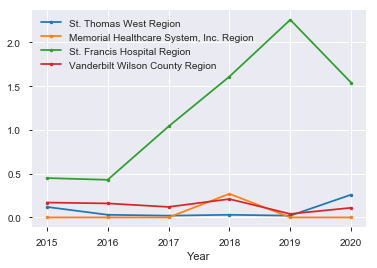

In [19]:
dates = pd.read_csv('data/dates.csv')
dates_ind = dates.set_index('Year')
dates_ind.plot.line(style='.-')